#                                      **Project -: Twitter Sentiment Analysis**



### Load and Analyze Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('tweet_data.csv')

In [ ]:
#Use the sample method to look at some random tweets present in our dataset
df.sample(10)

,textID,tweet_text,sentiment
9754,1694070871,@djruss99 love session 2 of king of queens,positive
2226,1960473858,I woke up with a sore throat Work tonight. Gr...,negative
17366,1753435364,Fog horn of DOOM! A great way to start the mor...,positive
16751,1753197222,"@twilightfan01 Lol, me too!!",positive
1248,1957589272,How I wish I get at least 2 days-off in a row....,negative
11874,1695056241,"@DavidArchie Hope you find a nice and healthy,...",positive
11551,1694881616,Heading to the U of Utah hospital. Have a grea...,positive
17560,1753501549,i'm celebrating my mother!! and also celebrat...,positive
13510,1751070940,needs shows before wednesay!!! oh well... come...,positive
3493,1961574579,"@spryken ah, I'm so sorry it I played a game ...",negative


In [ ]:
#Check how many tweets there are in total
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


In [ ]:
#Print tweet and its Sentiment based on a tweet ID
tweet_id = 4000
tweet = df.iloc[tweet_id]
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Oh dear. Sunburned back
Tweet sentiment: negative


## Data Visualization

### Matplotlib

In [ ]:
import matplotlib.pyplot as plt

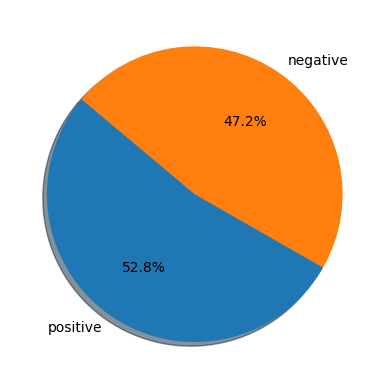

In [ ]:
#Distribution of tweets over the dataset
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [ ]:
#Count number of positive and negative tweets
print("Number of Positive tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of Negative tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of Positive tweets: 9897
Number of Negative tweets: 8830


### WordCloud

In [ ]:
from wordcloud import WordCloud

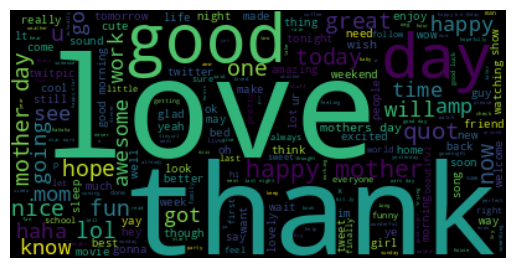

In [ ]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

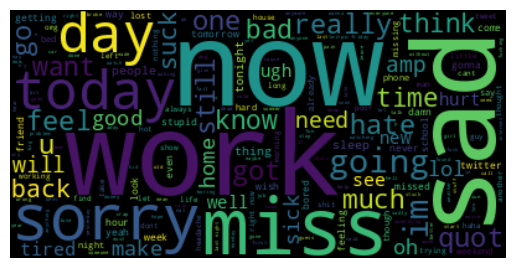

In [ ]:
neg_tweets = df[df["sentiment"]=="negative"]
txt1 = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Text Normalization

In [ ]:
import re

### Handle RT tag

In [ ]:
def replace_retweet(tweet, default_replace=""):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet

### Handle @User Tag

In [ ]:
def replace_user(tweet, default_replace="twitteruser"):
    tweet = re.sub('\B@\w+', default_replace, tweet)
    return tweet

### Handle Emojis

In [ ]:
pip install emoji

In [ ]:
import emoji

In [ ]:
def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

### Handle URLs

In [ ]:
def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

### Handle Hashtags

In [ ]:
def replace_hashtag(tweet, default_replace=""):
    tweet = re.sub('#+', default_replace, tweet)
    return tweet

### Word Features

#### Remove Upper Capitalization

In [ ]:
def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

#### Remove Word Repetition

In [ ]:
def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

#### Remove Punctuation Repetition

In [ ]:
def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])',default_replace, tweet)
    return tweet

#### Word Contractions

In [ ]:
pip install contractions

In [ ]:
import contractions

In [ ]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [ ]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

### Tokenization

In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Create set of english stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'to', 'them', 'her', 'further', 'such', "needn't", 'don', 'do', "mightn't", "you'd", "didn't", "haven't", 'needn', 'we', 'does', 'who', 'under', 'and', 'whom', 'each', "you've", 'm', 'as', 'd', "doesn't", 'by', 'very', 'when', 'all', 'up', 's', 're', 'ma', 'at', 'what', 'having', 'some', 've', "isn't", 'after', 'won', 'few', 'were', 'ourselves', "aren't", 'with', 'she', 'how', 'weren', 'yourselves', 'wasn', 'o', 'couldn', 'same', 'of', 'then', "you're", 'your', "hadn't", 'more', "that'll", 'between', 'most', 'should', 'doesn', 'wouldn', "wouldn't", 'into', 'why', 'ours', 'shan', 'about', 'hasn', 'its', 'has', 't', "should've", 'my', 'that', 'himself', "hasn't", 'above', 'am', 'down', 'll', 'until', 'is', 'where', 'have', 'below', 'themselves', 'from', 'didn', "you'll", 'this', 'during', "mustn't", "wasn't", "don't", 'but', 'no', 'than', "she's", 'our', 'had', "won't", 'did', 'mightn', 'theirs', 'which', 'while', 'a', 'can', 'y', 'me', 'herself', 'ain', 'their', 'doing', 'myself', 'him

In [ ]:
# Remove some stopwords from the set
stop_words.discard('not')
print(stop_words)

{'to', 'them', 'her', 'further', 'such', "needn't", 'don', 'do', "mightn't", "you'd", "didn't", "haven't", 'needn', 'we', 'does', 'who', 'under', 'and', 'whom', 'each', "you've", 'm', 'as', 'd', "doesn't", 'by', 'very', 'when', 'all', 'up', 's', 're', 'ma', 'at', 'what', 'having', 'some', 've', "isn't", 'after', 'won', 'few', 'were', 'ourselves', "aren't", 'with', 'she', 'how', 'weren', 'yourselves', 'wasn', 'o', 'couldn', 'same', 'of', 'then', "you're", 'your', "hadn't", 'more', "that'll", 'between', 'most', 'should', 'doesn', 'wouldn', "wouldn't", 'into', 'why', 'ours', 'shan', 'about', 'hasn', 'its', 'has', 't', "should've", 'my', 'that', 'himself', "hasn't", 'above', 'am', 'down', 'll', 'until', 'is', 'where', 'have', 'below', 'themselves', 'from', 'didn', "you'll", 'this', 'during', "mustn't", "wasn't", "don't", 'but', 'no', 'than', "she's", 'our', 'had', "won't", 'did', 'mightn', 'theirs', 'which', 'while', 'a', 'can', 'y', 'me', 'herself', 'ain', 'their', 'doing', 'myself', 'him

In [ ]:
# Create a custom_tokenize function
def custom_tokenize(tweet,
                        keep_punct = False,
                        keep_alnum = False,
                        keep_stop = False):
  token_list = word_tokenize(tweet)
  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

### Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# Create a stem_tokens function that takes the list of tokens as input and returns a list of stemmed tokens
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

### Putting all together

In [ ]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

## Text Representation

In [ ]:
pip install -U scikit-learn

#### Processing Tweets

In [ ]:
# Convert sentiment to 1  for "positive" and 0 for "negative" sentiment
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1 if i=="positive" else 0)

In [ ]:
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


In [ ]:
# Convert Dataframe to two list: One for tweet tokens(X) and one for the tweet sentiment (y)
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [ ]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

#### Positive/Negative Frequency



In [ ]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [ ]:
#Create a tweet_to_freqs function used to convert tweets to a 2-d array by using the frequency dictionnary
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

In [ ]:
def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

#### Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create fit_cv function used to build the Bag of Words vectorizer with the corpus
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer= lambda x: x, preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

#### TF-IDF (Term Frequency - Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create a fit_tfidf function to build the TF-IDF vectorizer with the corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x:x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

##### Helper Function

In [ ]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

## Train-Test Split

In [ ]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use the train_test_split function to split arrays of X and y into training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [ ]:
# Print the size of these new variables
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create fit_lr function used to fit a Logistic Regression model on X and y training data
def fit_lr(X_train, y_train):
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train, y_train)
  return model

#### Positive/Negative Frequency

In [ ]:
freqs = build_freqs(X_train, y_train)

In [ ]:
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

In [ ]:
# Fit the Logistic Regression model
model_lr_pn = fit_lr(X_train_pn, y_train)
# Print the model coeffiecients
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00257211 -0.00187775]] [-0.52986662]


#### Count Vectorizer(Bag of Words)

In [ ]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Fit the Logistic Regression Model
model_lr_cv = fit_lr(X_train_cv, y_train)

#### TF-IDF Vector

In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
model_lr_tf = fit_lr(X_train_tf, y_train)

## Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Positive/Negative Frequency

In [ ]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

In [ ]:
# Print the model accuracy by comparing predictions and real sentiments
print("This Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

This Model Accuracy: 78.48%


<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

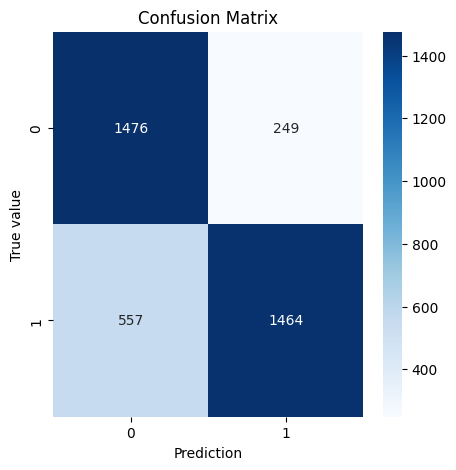

In [ ]:
#Plot the confusion matrix using the plot_confusion fuction
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

### Count Vector(Bag of Words)

In [ ]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [ ]:
# Print the model accuracy by comparing predictions and real sentiments
print("This Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

This Model Accuracy: 88.33%


<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

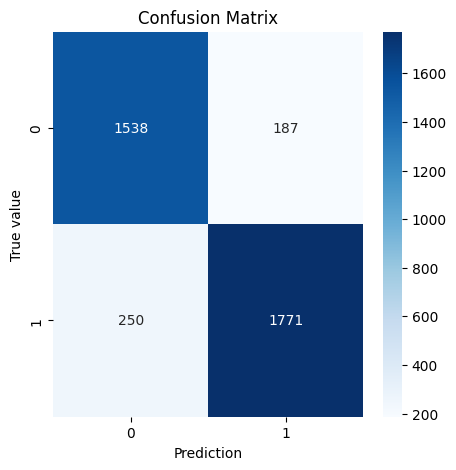

In [ ]:
#Plot the confusion matrix using the plot_confusion fuction
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

### TF-IDF Vector

In [ ]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [ ]:
# Print the model accuracy by comparing predictions and real sentiments
print("This Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

This Model Accuracy: 88.57%


<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

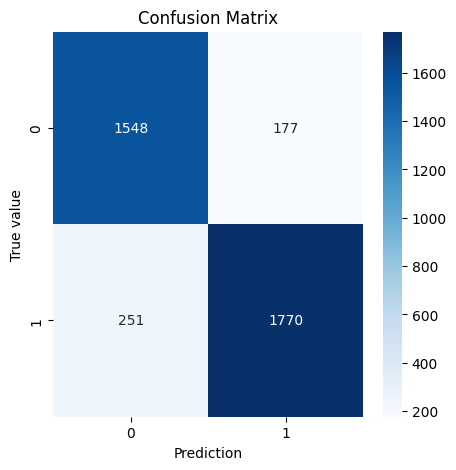

In [ ]:
#Plot the confusion matrix using the plot_confusion fuction
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## Mini Pipeline

In [ ]:
#Create a predict_tweet function used to pre-process,transform and predict tweet sentiment
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [ ]:
your_tweet = input("Enter Tweet for Sentiment check: ")

Enter Tweet for Sentiment check: i sad.


In [ ]:
predict_tweet(your_tweet)

'Prediction is negative sentiment'

#                               Thank You!